# Lab 5

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-5](https://yuanyuyuan.github.io/itcm/lab-5.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 12/11(Wed.)**

In [1]:
name = "黃宇文"
student_id = "B06201029"

---

# Exercise 1
---
### An $m \times m$ _Hilbert matrix_ $H_m$ has entries $h_{ij} = 1/(i+j-1)$ for $ 1 \leq i, j \leq m$, and so it has the form
### $$\left [
   \begin{matrix}
     1 & 1/2 & 1/3 & \dots \\
     1/2 & 1/3 & 1/4 & \dots \\
     1/3 & 1/4 & 1/5 & \dots \\
     \vdots      & \vdots      & \vdots & \ddots 
   \end{matrix}
  \right ].$$

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Part 1
### Generate the Hilbert matrix of order $m$, for $m=2,3,\ldots, 12$.
### For each $m$, compute the condition number of $H_{m}$,  _ie_ , in $p$-norm for $p=1$ and $2$, and make a plot of the results.

---
### Part 1.1 

Define the function of Hilbert matrix

In [3]:
def hilbert_matrix(m):
    '''
    Return:
        2D np.array, the Hildert Matrix of order m
    '''
    # ===== 請實做程式 =====\
    
    H=np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            H[i][j]=1/(i+j+1)
    return H
    # ====================

Test your function.

In [4]:
print('H_2:\n', hilbert_matrix(2))

H_2:
 [[1.         0.5       ]
 [0.5        0.33333333]]


---
### Part 1.2

Collect all Hilbert matrices into the list `H_m` for m = 2, 3, ..., 12.


In [5]:
H_m = []
# ===== 請實做程式 =====
for m in range(2,13):
    H = hilbert_matrix(m)
    H_m.append(H)
# ====================

Check your Hilbert matrix list.

In [6]:
for i in range(len(H_m)):
    print('H_%d:' % (i+2))
    print(H_m[i])
    print()

H_2:
[[1.         0.5       ]
 [0.5        0.33333333]]

H_3:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]

H_4:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]

H_5:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

H_6:
[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.1111111

---
### Part 1.3

Plot the condition number of $H_m$ for $m=2,3,\ldots, 12$

Collect all condition numbers in 1-norm of `H_m` into a list `one_norm`

In [7]:
one_norm = []
# ===== 請實做程式 =====
for m in range(2,13):
    one_norm.append(np.sum(hilbert_matrix(m)))
# ====================

In [8]:
print('one_norm:\n', one_norm)

one_norm:
 [2.3333333333333335, 3.6999999999999997, 5.076190476190476, 6.456349206349206, 7.838528138528138, 9.22187257187257, 10.605949605949606, 11.99051683610507, 13.375428063508556, 14.76058991747846, 16.145939989027887]


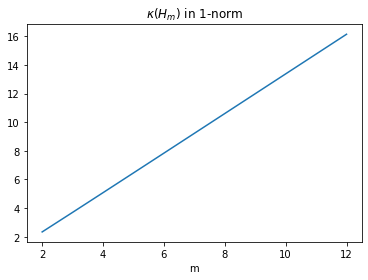

In [9]:
plt.plot(range(2,13), one_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 1-norm')
plt.show()

Collect all condition numbers in 2-norm of `H_m` into a list `two_norm`

In [10]:
two_norm = []
# ===== 請實做程式 =====
for m in range(2,13):
    two_norm.append(LA.norm(hilbert_matrix(m), 'fro'))
# ====================

In [11]:
print('two_norm:\n', two_norm)

two_norm:
 [1.2692955176439846, 1.413624183909335, 1.5097340998183075, 1.5809062632720223, 1.63702239330239, 1.6831324888435923, 1.7221431395612752, 1.755871909716653, 1.7855271226510334, 1.8119508009081233, 1.835752037381468]


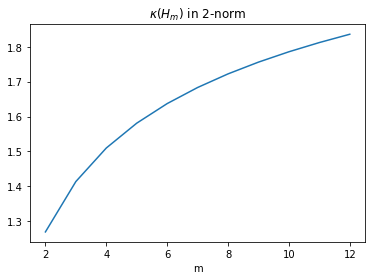

In [12]:
plt.plot(range(2,13), two_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 2-norm')
plt.show()

---
## Part 2 

### Now generate the $m$-vector $b_m = H_{m} x$ also, where $x$ is the $m$-vector with all of its components equal to $1$.

### Use Gaussian elimination to solve the resulting linear system $H_{m} x = b_m$ with $H_{m}$ and $b$ given above, obtaining an approximate solution $\tilde{x}$.

### Part 2.1

Construct the $m$-vector $b_m$ for $m = 2, 3, \dots, 12$. Store all 1D `np.array` $b_m$ into the list `b_m`.

In [13]:
'''
Hint:
    b_m = ?
'''
# ===== 請實做程式 =====
b_m = []

for i in range(len(H_m)):
    b_m.append(H_m[i] @ np.ones((i+2,1)))
# ====================

Print `b_m`

In [14]:
for i in range(len(b_m)):
    print('b_%d:' % (i+2))
    print(b_m[i])
    print()

b_2:
[[1.5       ]
 [0.83333333]]

b_3:
[[1.83333333]
 [1.08333333]
 [0.78333333]]

b_4:
[[2.08333333]
 [1.28333333]
 [0.95      ]
 [0.75952381]]

b_5:
[[2.28333333]
 [1.45      ]
 [1.09285714]
 [0.88452381]
 [0.74563492]]

b_6:
[[2.45      ]
 [1.59285714]
 [1.21785714]
 [0.99563492]
 [0.84563492]
 [0.73654401]]

b_7:
[[2.59285714]
 [1.71785714]
 [1.32896825]
 [1.09563492]
 [0.93654401]
 [0.81987734]
 [0.73013376]]

b_8:
[[2.71785714]
 [1.82896825]
 [1.42896825]
 [1.18654401]
 [1.01987734]
 [0.89680042]
 [0.80156233]
 [0.72537185]]

b_9:
[[2.82896825]
 [1.92896825]
 [1.51987734]
 [1.26987734]
 [1.09680042]
 [0.96822899]
 [0.86822899]
 [0.78787185]
 [0.72169538]]

b_10:
[[2.92896825]
 [2.01987734]
 [1.60321068]
 [1.34680042]
 [1.16822899]
 [1.03489566]
 [0.93072899]
 [0.84669538]
 [0.77725094]
 [0.7187714 ]]

b_11:
[[3.01987734]
 [2.10321068]
 [1.68013376]
 [1.41822899]
 [1.23489566]
 [1.09739566]
 [0.98955252]
 [0.90225094]
 [0.82988251]
 [0.7687714 ]
 [0.71639045]]

b_12:
[[3.10321068

### Part 2.2

Implement the function of __Gaussian elimination__. 

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [15]:
def gaussian_elimination(
    A,
    b
):
    '''
    Arguments:
        A : 2D np.array
        b : 1D np.array

    Return:
        x : 1D np.array, solution to Ax=b
    '''
    
    # ===== 請實做程式 =====
    U = A
    m = len(A)
    L = np.diag(np.ones(m))
    x = np.zeros([m,1])
    new_b = np.copy(b)
    
    for k in range(m-1):
        new_L = np.diag(np.ones(m))
        for j in range(k+1,m):
            new_L[j,k] = -U[j,k] / U[k,k]
            U[j, k:] = U[j, k:] + new_L[j,k] * U[k,k:]
            new_b[j,0] = new_b[j,0] + new_L[j,k] * new_b[k,0]
        L = new_L@L
        
    for i in range(m):
        if i == 0:
            x[-1,0] = new_b[-1,0] / U[-1,-1]
        else:
            x[-1-i,0] = (new_b[-1-i,0] - U[-1-i,-i:]@x[-i:,0]) / U[-1-i,-1-i]
    
    return x
    # ====================

Store all approximate solutions $\tilde{x}$ of $H_m$ into a list `x_m` for $m = 2, 3, \dots, 12$

In [16]:
x_m = []
for i in range(len(H_m)):
    x = gaussian_elimination(H_m[i], b_m[i])
    x_m.append(x)

---
## Part 3

### Investigate the error behavior of the computed solution $\tilde x$.
### (i) Compute the $\infty$-norm of the residual $r = b-H_{m} \tilde{x}$.
### (ii) Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. 
### (iii) How large can you take $m$ before there is no significant digits in the solution ?

### Part 3.1

Compute the $\infty$-norm of the residual $r_m = b_m-H_{m} \tilde{x}$ for $m = 2, 3, \dots, 12$. And store the values into the list `r_m`.

In [17]:
r_m = []
# ===== 請實做程式 =====
for i in range(2,13):
    r = b_m[i-2] - hilbert_matrix(i) @ x_m[i-2]
    r_m.append(LA.norm(r,np.inf))
# ====================


In [18]:
print('r_m:\n', r_m)

r_m:
 [0.0, 2.220446049250313e-16, 0.0, 1.1102230246251565e-16, 1.1102230246251565e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 4.440892098500626e-16, 2.220446049250313e-16]


Plot the figure of the $\infty$-norm of the residual for $m = 2, 3, \dots, 12$

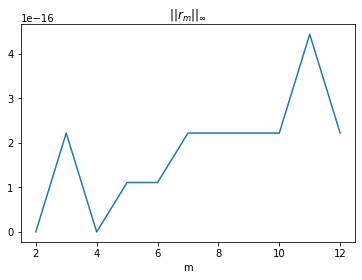

In [19]:
plt.plot(range(2,13), r_m)
plt.xlabel('m')
plt.title(r'$||r_m||_\infty$')
plt.show()

### Part 3.2

Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. And store the values into the list `delta_x`.

In [20]:
delta_x = []
# ===== 請實做程式 =====
for i in range(2,13):
    delta_x.append(x_m[i-2]-np.ones((i,1)))
# ====================

Collect all errors $\delta x$ in 2-norm into the list `delta_x_two_norm` for $m = 2, 3, ..., 12$

In [21]:
delta_x_two_norm = []
# ===== 請實做程式 =====
for i in range(2,13):
    delta_x_two_norm.append(LA.norm(delta_x[i-2], 'fro'))
# ====================

In [22]:
print('delta_x_two_norm =', delta_x_two_norm)

delta_x_two_norm = [8.005932084973442e-16, 1.762179615616027e-14, 1.531093756529614e-13, 3.0608640212050944e-11, 6.557024926145587e-10, 1.685184424292123e-08, 7.609411454919248e-07, 2.689554885994736e-05, 0.0013355950220451237, 0.025696459345968693, 0.6227493030170683]


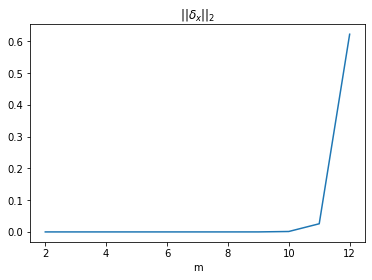

In [23]:
plt.plot(range(2,13), delta_x_two_norm)
plt.xlabel('m')
plt.title(r'$||\delta_x||_2$')
plt.show()

### Part 3.3

How large can you take  $m$  before there is no significant digits in the solution ?

When $m=10$, the graph starts rising gradually. \
When $m=11$, the graph starts rocketing. \
Hence, $m$ should take the values which are not greater than $10$.